## Project: NLP 
### Subject Text Classification 
#### Aug 2021
> Dr Chitra Desai

## 1. Introduction and Problem Statement

Text Classification is the task were we classify the text depending upon to which class it belongs. The problem statement may belong to binary class or multiclass. In this project , multiclass target variable is text classifcation problem is presented.Here the text classification is performed using logistic regression, naive bayes machine learning algorithm. The same data set is also used to perform text classification using LSTM and GRU.The details of the data set as as below:
#### Content
- The dataset consists of about 1800 samples of text belonging to different school subjects.
- This data set was collected from school text books of 11th and 12th grade.
- The data is present in a single csv file:
- subject_text.csv - Dataset consisting of about 1800 samples of text from school books.


#### Data Description
- It has two columns text and Label
    1. text     The body of the text.
    2. label    The subject of the sample text.


#### Objective:
- This dataset is intended for multi-class text classification tasks.
- Use this data set to train a model able to predict the topic of the text passed by the user

## 2. Data Preprocessing

#### 2.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas.util.testing as tm
import string

# train test split
from sklearn.model_selection import train_test_split

# label encoding
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


#### 2.2 Load Data

In [4]:
df=pd.read_csv('subject_text.csv')

In [5]:
df.shape

(1786, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1786 non-null   object
 1   label   1786 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [7]:
df.head()

text     label
0   Trial Balance and Rectification of Errors 199...  accounts
1   Issue and Redemption of Debentures 1 03  perc...  accounts
2   Trial Balance and Rectification of Errors 21 ...  accounts
3   Accounting for Share Capital 1 9  In practice...  accounts
4   80 Accountancy : Company Accounts and Analysi...  accounts

#### 2.3 Checking for Null and Duplicates

In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df[df.duplicated()]

text      label
316    BIOLOGY  Mammals from colder climates general...    biology
400    TRANSPORT IN PLANTS  the loss of water in the...    biology
416    ORGANISMS AND POPULATIONS     Figure 13.7 Mut...    biology
424    ORGANISMS AND POPULATIONS  (iii) Migrate: The...    biology
453    TRANSPORT IN PLANTS  examples of imbibition a...    biology
...                                                 ...        ...
1698   (I'rmx'vrsit'rll . ' (":mum'ntul Rm ”3111' Ha...  geography
1718   EURASIAN PLATE NORTH AMERICAN 60° PLATE  \/ M...  geography
1766   HOSZCHH  CHAPTER  ou have already learnt that...  geography
1771   98  (ii)  (iii)  (iV)  FUNDAMENTALS OF PHYSIC...  geography
1775   96  of the earth. These are extremely dense a...  geography

[90 rows x 2 columns]

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(1696, 2)

#### 2.4 Checking for Unique Target variables

In [12]:
df['label'].unique()

array(['accounts', 'biology', 'physics', 'geography'], dtype=object)

In [13]:
df.groupby('label').size()

label
accounts     284
biology      595
geography     93
physics      724
dtype: int64

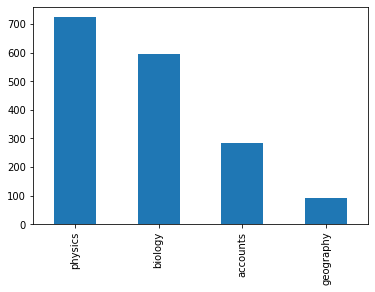

In [14]:
df['label'].value_counts().plot(kind='bar')

#### Observation
1. There are total 4 classes in target varaible and hence a multiclass problem.
2. They are physics, biology, accounts and geography
3. The value count across each class is 
    - accounts     284
    - biology      595
    - geography     93
    - physics      724
4. Data Appears to be highly imbalanced 

#### 2.5 Apply Label Encoding to Target Variable

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
df['label']= label_encoder.fit_transform(df['label'])

In [17]:
df['label'].unique()

array([0, 1, 3, 2])

In [18]:
df.head()

text  label
0   Trial Balance and Rectification of Errors 199...      0
1   Issue and Redemption of Debentures 1 03  perc...      0
2   Trial Balance and Rectification of Errors 21 ...      0
3   Accounting for Share Capital 1 9  In practice...      0
4   80 Accountancy : Company Accounts and Analysi...      0

#### Observations
- After label encoding:
0 - accounts 1 - biology 2 - physics 3 - geography

#### 2.6 Checking the Text Length before Text Preprocessing

In [19]:
sumtext=df['text'].str.len()
#print(type(sumtext))
df['TextLen']=sumtext

In [20]:
df.head()

text  label  TextLen
0   Trial Balance and Rectification of Errors 199...      0     2244
1   Issue and Redemption of Debentures 1 03  perc...      0     1850
2   Trial Balance and Rectification of Errors 21 ...      0     1440
3   Accounting for Share Capital 1 9  In practice...      0     1684
4   80 Accountancy : Company Accounts and Analysi...      0     1122

In [21]:
df.describe()

label      TextLen
count  1696.000000  1696.000000
mean      1.741156  2204.846108
std       1.175303   772.701475
min       0.000000   278.000000
25%       1.000000  1607.750000
50%       1.000000  2246.000000
75%       3.000000  2740.750000
max       3.000000  5012.000000

#### Observations
1. Mean length of text is 2204
2. Considering the values of interquartile range and min and max value ,we see there are outliars.

## 3. Text Preprocessing

#### 3.1 Convert to Lower case

In [22]:
df1=df

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1785
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1696 non-null   object
 1   label    1696 non-null   int64 
 2   TextLen  1696 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.0+ KB


In [24]:
df1=df1.drop(['TextLen'], axis = 1)

In [25]:
df1.text=df1['text'].str.lower()

In [26]:
df1.head()

text  label
0   trial balance and rectification of errors 199...      0
1   issue and redemption of debentures 1 03  perc...      0
2   trial balance and rectification of errors 21 ...      0
3   accounting for share capital 1 9  in practice...      0
4   80 accountancy : company accounts and analysi...      0

#### 3.2 Data Cleaning steps

In [1]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [28]:
df1.text=df1['text'].apply(lambda x: decontracted(x))

In [29]:
df1.sample(5)

text  label
272    4 2 accountancy : company accounts and analys...      0
1180   electrostatic potential  and capacitance  sin...      3
750    morphology of flowering plants 7 1  in palmat...      1
813    118     biology  on land, the buccal cavity, ...      1
971    26  physics     how will you measure the leng...      3

In [30]:
# turn a doc into clean tokens
def cleantxt(txt):
    # replace '--' with a space ' '
    txt = txt.replace('--', ' ')
    txt = re.sub(r'https?:\/\/.*[\r\n]*', '', txt,  
                  flags=re.MULTILINE)
    txt = re.sub(r'\<a href', ' ', txt)
    txt = re.sub(r'&amp;', '', txt) 
    txt = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', txt)
    txt = re.sub(r'<br />', ' ', txt)
    txt = re.sub(r'\'', ' ', txt)
    # split into tokens by white space
    tokens = txt.split()
         
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    txt = " ".join(tokens)
    
    return txt

In [31]:
df1.text=df1['text'].apply(lambda x: cleantxt(x))

In [32]:
df1.head()

text  label
0  trial balance and rectification of errors the ...      0
1  issue and redemption of debentures percentage ...      0
2  trial balance and rectification of errors illu...      0
3  accounting for share capital in practice the e...      0
4  accountancy company accounts and analysis of f...      0

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
stopword = stopwords.words("english")
wordnet_lemmatizer = WordNetLemmatizer()

In [35]:
def stopwordfn(txt):
    word_tokens = nltk.word_tokenize(txt)
    word_tokens = [w for w in word_tokens if not w in stopword]
    word_tokens = [wordnet_lemmatizer.lemmatize(txt) for txt in word_tokens]
    word_tokens = " ".join(word_tokens)
    return word_tokens

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
df1.text=df1['text'].apply(lambda x: stopwordfn(x))

In [39]:
df1.head()

text  label
0  trial balance rectification error trial balanc...      0
1  issue redemption debenture percentage usually ...      0
2  trial balance rectification error illustration...      0
3  accounting share capital practice entry amount...      0
4  accountancy company account analysis financial...      0

#### 3.3 Text Length Calculation

In [40]:
sumtext=df1['text'].str.len()
#print(type(sumtext))
df1['TextLen']=sumtext

In [41]:
df1.describe()

label      TextLen
count  1696.000000  1696.000000
mean      1.741156  1408.629717
std       1.175303   513.246585
min       0.000000     8.000000
25%       1.000000  1019.000000
50%       1.000000  1424.000000
75%       3.000000  1783.250000
max       3.000000  3367.000000

In [42]:
df1[df1['TextLen']>3000]

text  label  TextLen
938   duol nature radiation every body temperature e...      3     3175
1265  g ravitati india leap space india started spac...      3     3367
1688  geography discipline ocean geographical factor...      2     3048

In [43]:
df1.at[938,'text']

'duol nature radiation every body temperature emits radiation wavelength also absorbs radiation falling body absorbs radiation falling called black body ideal concept physic like concept point mass uniform motion graph intensity radiation emitted body versus wavelength called black body spectrum theory day could explain complete black body spectrum planck hit upon novel idea assume said radiation emitted packet energy instead continuously wave explain black body spectrum planck regarded quantum packet property emission absorption rather light derived formula agreed entire spectrum confusing mixture wave particle picture radiation emitted particle travel wave absorbed particle moreover put physicist dilemma accept particle picture light explain one phenomenon happens phenomenon interference diffraction explained particle model soon einstein explained photoelectric effect assuming particle picture light debye explained low temperature specific heat solid using particle picture lattice vi

In [44]:
df1[df1['TextLen']<100]

text  label  TextLen
1172                                     l physic      3        8
1254  simulate propagation electromagnetic wave e      3       43
1316        physic hysterisis magnetic material f      3       37
1660                                     l physic      3        8

#### 3.4 Class Wise Distribution of Text length

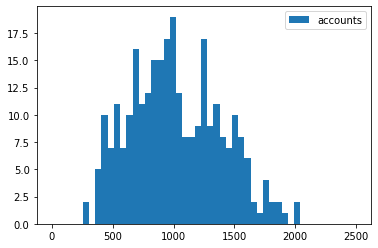

In [45]:
bins=np.linspace(0,2500,50)
pyplot.hist(df1[df1['label']==0]['TextLen'],bins,label='accounts')

pyplot.legend(loc='upper right')
pyplot.show()

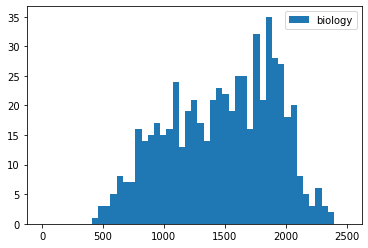

In [46]:
bins=np.linspace(0,2500,50)

pyplot.hist(df1[df1['label']==1]['TextLen'],bins,label='biology')

pyplot.legend(loc='upper right')
pyplot.show()

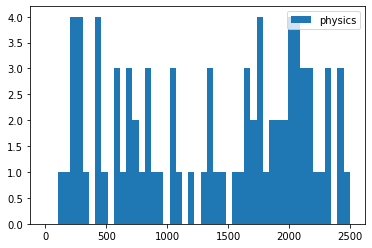

In [47]:
bins=np.linspace(0,2500,50)

pyplot.hist(df1[df1['label']==2]['TextLen'],bins,label='physics')

pyplot.legend(loc='upper right')
pyplot.show()

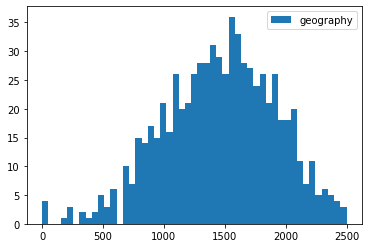

In [48]:
bins=np.linspace(0,2500,50)
pyplot.hist(df1[df1['label']==3]['TextLen'],bins,label='geography')
pyplot.legend(loc='upper right')
pyplot.show()

In [49]:
results = set()
df1['text'].str.lower().str.split().apply(results.update)
print('The unique Words in text column',len(results))

The unique Words in text column 18632


In [50]:
from collections import Counter
results = Counter()
df1['text'].str.lower().str.split().apply(results.update)
print(results)

Counter({'b': 2257, 'c': 2173, 'r': 1951, 'force': 1743, 'x': 1713, 'two': 1606, 'share': 1590, 'e': 1522, 'cell': 1473, 'called': 1450, 'energy': 1444, 'one': 1390, 'figure': 1346, 'charge': 1316, 'plant': 1250, 'point': 1177, 'body': 1172, 'time': 1148, 'also': 1136, 'current': 1135, 'fig': 1063, 'water': 1020, 'v': 1017, 'motion': 982, 'mass': 960, 'system': 940, 'wave': 917, 'example': 911, 'cash': 898, 'field': 889, 'account': 880, 'due': 880, 'l': 870, 'debenture': 867, 'surface': 856, 'light': 823, 'magnetic': 806, 'particle': 804, 'direction': 792, 'p': 788, 'may': 777, 'amount': 762, 'n': 751, 'given': 750, 'number': 733, 'per': 721, 'electric': 711, 'u': 702, 'thus': 690, 'f': 689, 'different': 673, 'law': 673, 'vector': 663, 'speed': 655, 'potential': 652, 'form': 634, 'q': 630, 'velocity': 621, 'balance': 617, 'g': 602, 'electron': 602, 'unit': 596, 'like': 594, 'organism': 588, 'total': 587, 'eq': 586, 'area': 575, 'distance': 558, 'value': 550, 'book': 541, 'used': 541, '

## Observations
- After text preprocesssing:
    1. min has dropped from 278 to 9 and max from 5012 to 3367
    2. mean has dropped from 2204 to 1408
    3. The Distribution appears normal for all class except for Physics
    4. The unique Words in text column 18632
    

## 4. Train Test Split and Token Generation

#### The data is split into 80% training data and 20% testing data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df1["text"],df1["label"],test_size=0.2,shuffle=True)

In [52]:
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [53]:
X_train_tok

[['algae',
  'bryophyte',
  'pteridophyte',
  'gymnospenns',
  'angiospenns',
  'plant',
  'life',
  'cycle',
  'allemation',
  'l',
  'l',
  'chapter',
  'plant',
  'mngdom',
  'previous',
  'chapter',
  'looked',
  'broad',
  'classification',
  'living',
  'organism',
  'system',
  'proposed',
  'whittaker',
  'wherein',
  'suggested',
  'five',
  'kingdom',
  'classification',
  'viz',
  'monera',
  'protista',
  'fungi',
  'animalia',
  'plantae',
  'chapter',
  'deal',
  'detail',
  'classiﬁcation',
  'within',
  'kingdom',
  'plantae',
  'popularly',
  'known',
  'must',
  'stress',
  'understanding',
  'plant',
  'kingdom',
  'changed',
  'time',
  'fungi',
  'member',
  'monera',
  'protista',
  'cell',
  'wall',
  'excluded',
  'plantae',
  'though',
  'earlier',
  'classiﬁcations',
  'placed',
  'kingdom',
  'cyanobacteria',
  'also',
  'referred',
  'blue',
  'green',
  'algae',
  'chapter',
  'describe',
  'algae',
  'bryophyte',
  'pteridophyte',
  'gymnosperm',
  'angios

## 5. Tranformation and Machine Learning Model 

#### 5.1 TFIDF

TF-IDF, which stands for term frequency — inverse document frequency, is a scoring measure widely used in information retrieval (IR) or summarization. TF-IDF is intended to reflect how relevant a term is in a given document.

In [54]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [55]:
X_train_vectors_tfidf.shape

(1356, 17010)

In [56]:
X_test_vectors_tfidf.shape

(340, 17010)

In [57]:
X_train_vectors_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
dfxtrain=pd.DataFrame(X_train_vectors_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [59]:
dfxtrain.head()

aa  aaa  aabbcc  aabout  aal  aame  ...  ﬂutter  ﬂux  ﬂuxes   ﬂy  ﬂying  ﬂywheel
0  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
1  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
2  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
3  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
4  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0

[5 rows x 17010 columns]

In [60]:
dftest=pd.DataFrame(X_test_vectors_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [61]:
dftest.head()

aa  aaa  aabbcc  aabout  aal  aame  ...  ﬂutter  ﬂux  ﬂuxes   ﬂy  ﬂying  ﬂywheel
0  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
1  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
2  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
3  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0
4  0.0  0.0     0.0     0.0  0.0   0.0  ...     0.0  0.0    0.0  0.0    0.0      0.0

[5 rows x 17010 columns]

#### 5.2 Model Fitting

#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
classifier=LogisticRegression()

In [64]:
classifier.fit(X_train_vectors_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
score=classifier.score(X_test_vectors_tfidf,y_test)

In [66]:
print("Accuracy ",score)

Accuracy  0.9647058823529412


#### 5.3 Creating Bag of Words Model

#### Count Vectorizer

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer(max_features=1500)
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [69]:
X_train_vectors_cv = cv.fit_transform(X_train) 
X_test_vectors_cv = cv.transform(X_test)

In [70]:
X_train_vectors_cv.shape

(1356, 1500)

In [71]:
X_test_vectors_cv.shape

(340, 1500)

#### 5.4 Fitting Naive Bayes to the Training set

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
classifier = MultinomialNB()
classifier.fit(X_train_vectors_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
y_pred = classifier.predict(X_test_vectors_cv)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9705882352941176

## 6.Deep Neural Network

This section the task of test classification is performed using LSTM and GRU. 

#### 6.1 Train Test Split and Sequence Padding

In [76]:
X=np.array(df1['text'])
y=np.array(df1['label'])
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [105]:
from tensorflow.keras.utils import to_categorical
categorical_labels = to_categorical(y,num_classes=4)

In [95]:
categorical_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels, test_size=0.20, random_state=42)

In [155]:
X_train.shape

(1356,)

In [156]:
y_train.shape

(1356, 4)

In [157]:
tokenizer = Tokenizer(num_words=18632)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [158]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [159]:
maxlen = 1400

In [160]:
vocab_size = len(word_index) + 1
vocab_size 

18633

In [161]:
xtrain=pad_sequences(X_train,padding='post', maxlen=maxlen)
xtest=pad_sequences(X_test,padding='post', maxlen=maxlen)

In [162]:
xtrain[5]

array([ 87,  11, 275, ...,   0,   0,   0], dtype=int32)

In [163]:
import tensorflow as tf

In [164]:
train_ds=tf.data.Dataset.from_tensor_slices((xtrain,y_train))

In [165]:
test_ds=tf.data.Dataset.from_tensor_slices((xtest,y_test))

#### 6.2 LSTM

In [166]:
embedding_dim=16 # every word will get convereted to 16 bit vevtor
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=maxlen))
model.add(layers.LSTM(embedding_dim,dropout=0.2,return_sequences=True))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(layers.Dense(4, activation="softmax"))

In [167]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
     metrics=['accuracy'])

In [168]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1400, 16)          298128    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1400, 16)          2112      
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 22400)             0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 512)               11469312  
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total params: 11,771,604
Trainable params: 11,771,604
Non-trainable params: 0
_________________________________________________________________


In [169]:
history=model.fit(train_ds.shuffle(5000).batch(1024),epochs=15,validation_data=test_ds.batch(1024))

Epoch 1/15
2/2 [==============================] - 4s 1s/step - loss: 1.8023 - accuracy: 0.2091 - val_loss: 2.9901 - val_accuracy: 0.3765
Epoch 2/15
2/2 [==============================] - 1s 289ms/step - loss: 2.7950 - accuracy: 0.3687 - val_loss: 1.1523 - val_accuracy: 0.4088
Epoch 3/15
2/2 [==============================] - 1s 280ms/step - loss: 1.1027 - accuracy: 0.4606 - val_loss: 1.0783 - val_accuracy: 0.3941
Epoch 4/15
2/2 [==============================] - 1s 266ms/step - loss: 1.0114 - accuracy: 0.4657 - val_loss: 0.9569 - val_accuracy: 0.4618
Epoch 5/15
2/2 [==============================] - 1s 260ms/step - loss: 0.8600 - accuracy: 0.5398 - val_loss: 0.7406 - val_accuracy: 0.8059
Epoch 6/15
2/2 [==============================] - 1s 262ms/step - loss: 0.6471 - accuracy: 0.8566 - val_loss: 0.5772 - val_accuracy: 0.8882
Epoch 7/15
2/2 [==============================] - 1s 270ms/step - loss: 0.4883 - accuracy: 0.9098 - val_loss: 0.4573 - val_accuracy: 0.9265
Epoch 8/15
2/2 [=======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


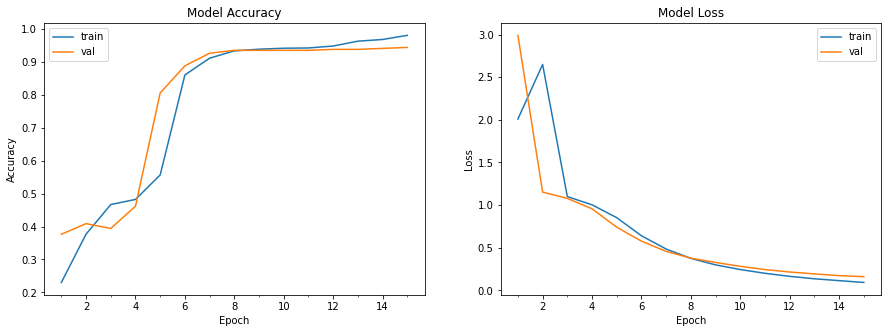

In [170]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

#### 6.3 GRU

In [172]:
embedding_dim=16 # every word will get convereted to 16 bit vevtor
model1=Sequential()
model1.add(layers.Embedding(input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=maxlen))
model1.add(layers.GRU(embedding_dim,dropout=0.2,return_sequences=True))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512,activation='relu'))
model1.add(layers.Dense(4, activation="softmax"))

In [174]:
model1.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
     metrics=['accuracy'])

In [175]:
history1=model1.fit(train_ds.shuffle(5000).batch(1024),epochs=15,validation_data=test_ds.batch(1024))

Epoch 1/15
2/2 [==============================] - 5s 985ms/step - loss: 2.1008 - accuracy: 0.2030 - val_loss: 3.2462 - val_accuracy: 0.3765
Epoch 2/15
2/2 [==============================] - 1s 305ms/step - loss: 3.0861 - accuracy: 0.3276 - val_loss: 1.1487 - val_accuracy: 0.5029
Epoch 3/15
2/2 [==============================] - 1s 290ms/step - loss: 1.1390 - accuracy: 0.4516 - val_loss: 1.2017 - val_accuracy: 0.3765
Epoch 4/15
2/2 [==============================] - 1s 276ms/step - loss: 1.1895 - accuracy: 0.3596 - val_loss: 1.0203 - val_accuracy: 0.5765
Epoch 5/15
2/2 [==============================] - 1s 270ms/step - loss: 0.9819 - accuracy: 0.5930 - val_loss: 0.8998 - val_accuracy: 0.7706
Epoch 6/15
2/2 [==============================] - 1s 273ms/step - loss: 0.8614 - accuracy: 0.7274 - val_loss: 0.8200 - val_accuracy: 0.7412
Epoch 7/15
2/2 [==============================] - 1s 268ms/step - loss: 0.7663 - accuracy: 0.7354 - val_loss: 0.6229 - val_accuracy: 0.8676
Epoch 8/15
2/2 [====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


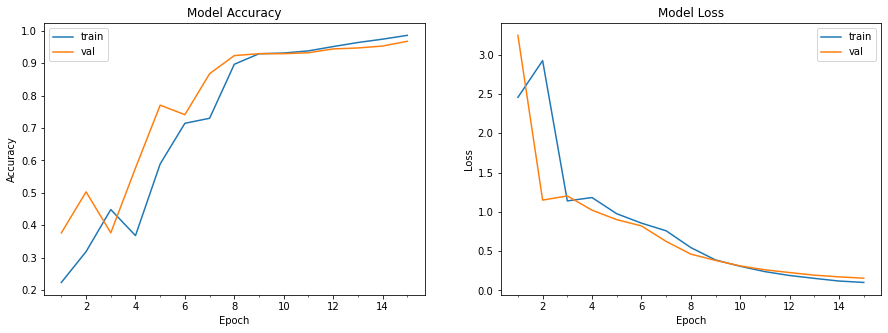

In [176]:
plot_model_history(history1)

## 7.2 Conclusion
1. The problem statement is of text classification for multiclass.
2. The data set consist of two columns - text and labels. There are total 4 classes - accounts, physics, biology and geography
3. Text processing is applied on to the data to clean the text.
4. Text classifcation is achieved here with both:
    - Machine Learning and 
    - Deep Neural Network
5. Initially, TFIDF is used for tranformation and then Logistic Regression is applied for classification. 
6. Using Logistic Regression the Accuracy score obtained is 0.9647058823529412
7. Then the cleaned data set is again transformed using Bag of words (Countvectorizer) and then NAive Bayes Algorithm is applied for text classification.
8. Using Naive Bayes Algorithm, the Accuracy score obtained is 0.9705882352941176
9. Using LSTM the text classification is performed. With epochs 15 and batch of 1024, the train accuracy is 0.9801 and validation accuracy is 0.9441
10. Using GRU the text classification is performed. With epochs 15 and batch of 1024, the train accuracy is 0.9874 and validation accuracy is 0.9676